In [23]:
import pandas as pd

df = pd.read_csv("../data/raw/kd_all.csv")
df = df[df['GP'] >= 50]
print(df)

   SEASON_ID TEAM_ABBREVIATION  PLAYER_AGE  GP  GS   MIN   PTS  REB  AST  \
0    2007-08               SEA        19.0  80  80  2768  1624  348  192   
1    2008-09               OKC        20.0  74  74  2885  1871  482  205   
2    2009-10               OKC        21.0  82  82  3239  2472  623  231   
3    2010-11               OKC        22.0  78  78  3038  2161  533  214   
4    2011-12               OKC        23.0  66  66  2546  1850  527  231   
5    2012-13               OKC        24.0  81  81  3119  2280  640  374   
6    2013-14               OKC        25.0  81  81  3122  2593  598  445   
8    2015-16               OKC        27.0  72  72  2578  2029  589  361   
9    2016-17               GSW        28.0  62  62  2070  1555  513  300   
10   2017-18               GSW        29.0  68  68  2325  1792  464  366   
11   2018-19               GSW        30.0  78  78  2702  2027  497  457   
13   2021-22               BKN        33.0  55  55  2047  1643  407  351   
17   2023-24

C:\Users\abdal\AppData\Local\Temp\ipykernel_18004\2089040200.py:9: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([ln_pts, h1, h1_bis], ["PTS", f"Moyenne: {moyenne_pts:.1f}", f"Médiane: {median_pts:.1f}"])


<function matplotlib.pyplot.show(close=None, block=None)>

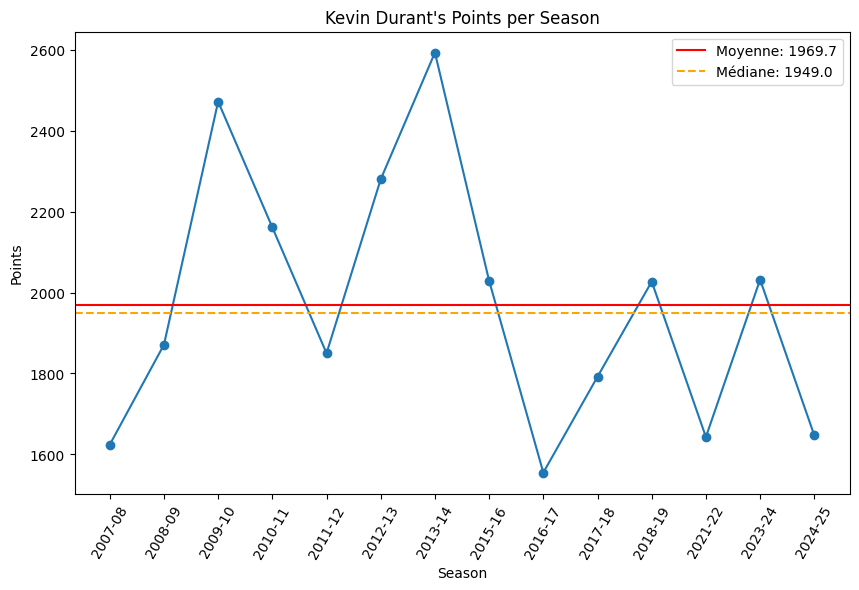

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ln_pts = plt.plot(df['SEASON_ID'], df['PTS'], marker='o')
moyenne_pts = df["PTS"].mean()
median_pts = df["PTS"].median()
h1 = plt.axhline(moyenne_pts, color="red", linestyle="-")
h1_bis = plt.axhline(median_pts, color="orange", linestyle="--")
plt.legend([ln_pts, h1, h1_bis], ["PTS", f"Moyenne: {moyenne_pts:.1f}", f"Médiane: {median_pts:.1f}"])
plt.title("Kevin Durant's Points per Season")
plt.xlabel("Season")
plt.ylabel("Points")
plt.xticks(rotation=60)
plt.show

C:\Users\abdal\AppData\Local\Temp\ipykernel_18004\2959248274.py:7: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([ln_eff, h2, h2_bis], ["EFF", f"Moyenne: {moyenne_eff:.1f}", f"Médiane: {median_eff:.1f}"])


<function matplotlib.pyplot.show(close=None, block=None)>

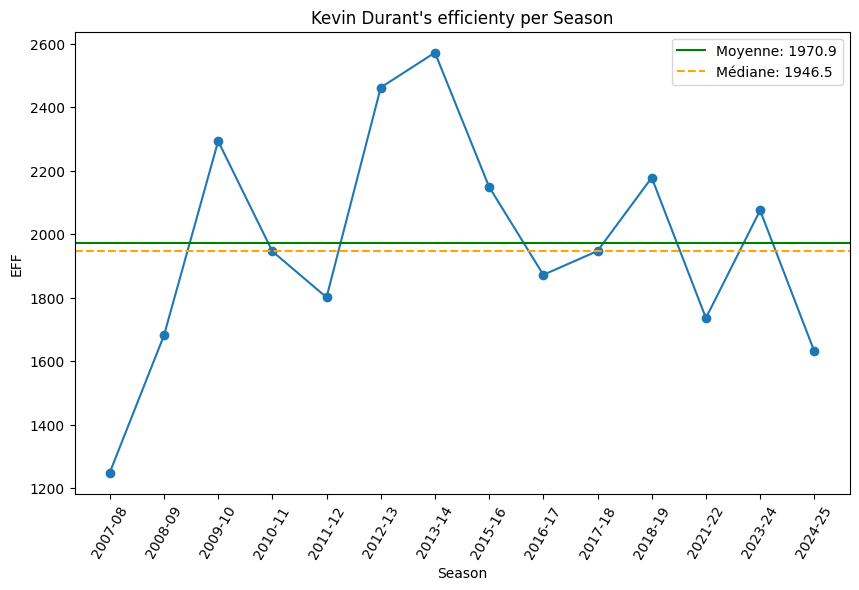

In [30]:
plt.figure(figsize=(10, 6))
ln_eff = plt.plot(df['SEASON_ID'], df['EFF'], marker='o')
moyenne_eff = df["EFF"].mean()
median_eff = df["EFF"].median()
h2 = plt.axhline(moyenne_eff, color="green", linestyle="-")
h2_bis = plt.axhline(median_eff, color="orange", linestyle="--")
plt.legend([ln_eff, h2, h2_bis], ["EFF", f"Moyenne: {moyenne_eff:.1f}", f"Médiane: {median_eff:.1f}"])
plt.title("Kevin Durant's efficienty per Season")
plt.xlabel("Season")
plt.ylabel("EFF")
plt.xticks(rotation=60)
plt.show

C:\Users\abdal\AppData\Local\Temp\ipykernel_18004\1789150726.py:7: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([ln_ts, h3, h3_bis], ["TS_PCT", f"Moyenne: {moyenne_ts:.3f}", f"Médiane: {median_ts:.3f}"])


<function matplotlib.pyplot.show(close=None, block=None)>

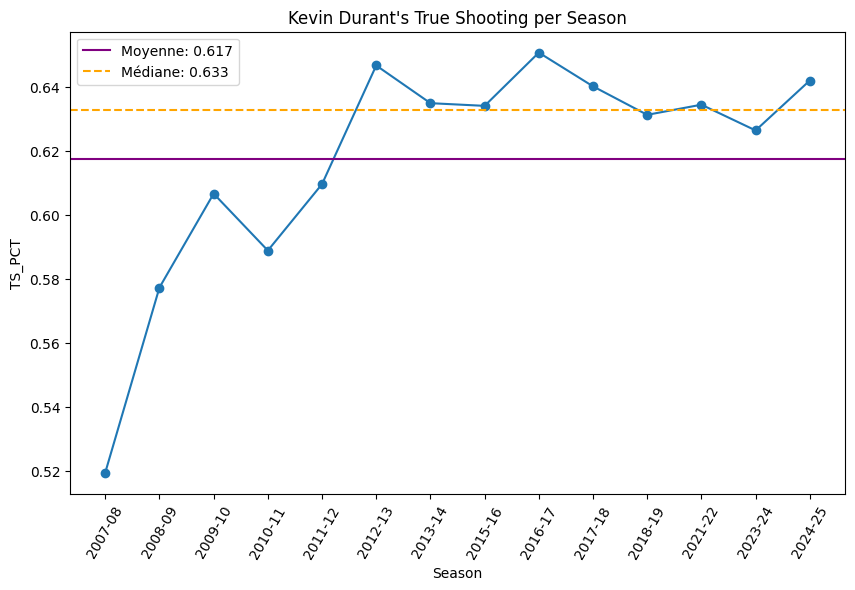

In [33]:
plt.figure(figsize=(10, 6))
ln_ts = plt.plot(df['SEASON_ID'], df['TS_PCT'], marker='o')
moyenne_ts = df["TS_PCT"].mean()
median_ts = df["TS_PCT"].median()
h3 = plt.axhline(moyenne_ts, color="purple", linestyle="-")
h3_bis = plt.axhline(median_ts, color="orange", linestyle="--")
plt.legend([ln_ts, h3, h3_bis], ["TS_PCT", f"Moyenne: {moyenne_ts:.3f}", f"Médiane: {median_ts:.3f}"])
plt.title("Kevin Durant's True Shooting per Season")
plt.xlabel("Season")
plt.ylabel("TS_PCT")
plt.xticks(rotation=60)
plt.show

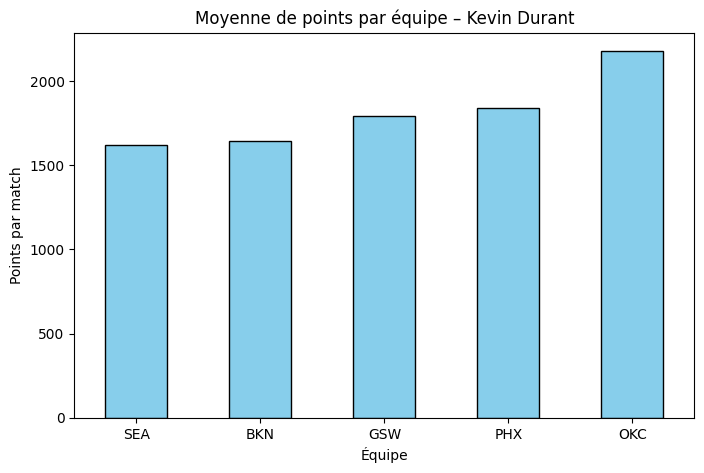

In [ ]:

# calcul des moyennes de points par équipe
pts_team = df.groupby("TEAM_ABBREVIATION")["PTS"].mean().sort_values()

# barplot
plt.figure(figsize=(8,5))
pts_team.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Moyenne de points par équipe – Kevin Durant")
plt.xlabel("Équipe")
plt.ylabel("Moyenne de points sur toute les équipes")
plt.xticks(rotation=0)
plt.show()

C:\Users\abdal\AppData\Local\Temp\ipykernel_18004\752257076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TEAM_ABBREVIATION", y="PTS", data=df, palette="pastel")


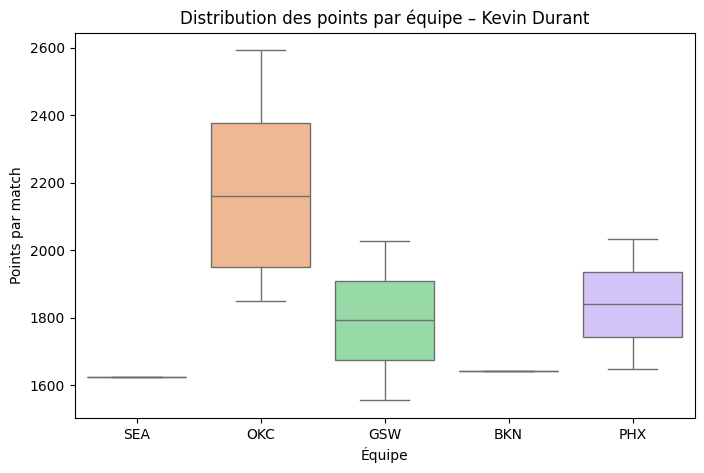

In [47]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x="TEAM_ABBREVIATION", y="PTS", data=df, palette="pastel")

plt.title("Distribution des points par équipe – Kevin Durant")
plt.xlabel("Équipe")
plt.ylabel("Points par match")
plt.show()

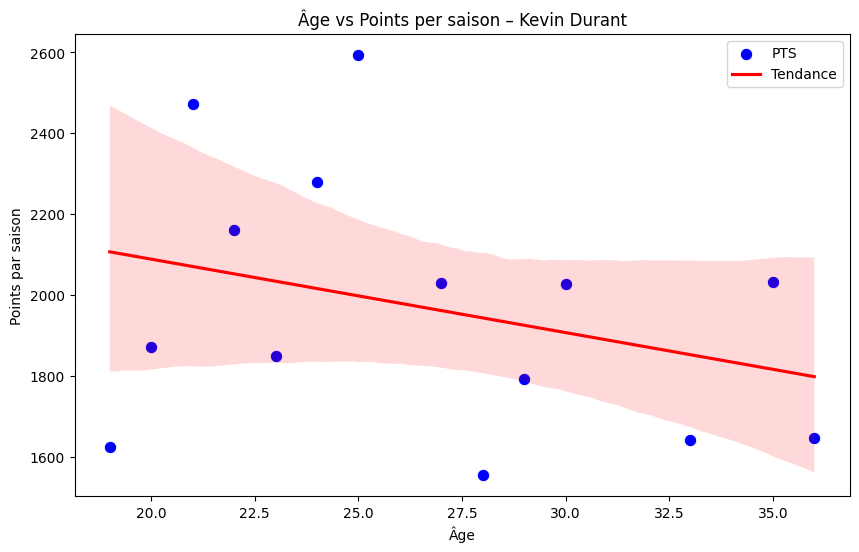

In [48]:

plt.figure(figsize=(10, 6))
# nuage de points
sns.scatterplot(x="PLAYER_AGE", y="PTS", data=df, s=80, color="blue", marker="o", label="PTS")

# ligne de tendance (régression linéaire)
sns.regplot(x="PLAYER_AGE", y="PTS", data=df, scatter=False, color="red", label="Tendance")

plt.title("Âge vs Points per saison – Kevin Durant")
plt.xlabel("Âge")
plt.ylabel("Points par saison")
plt.legend()
plt.show()

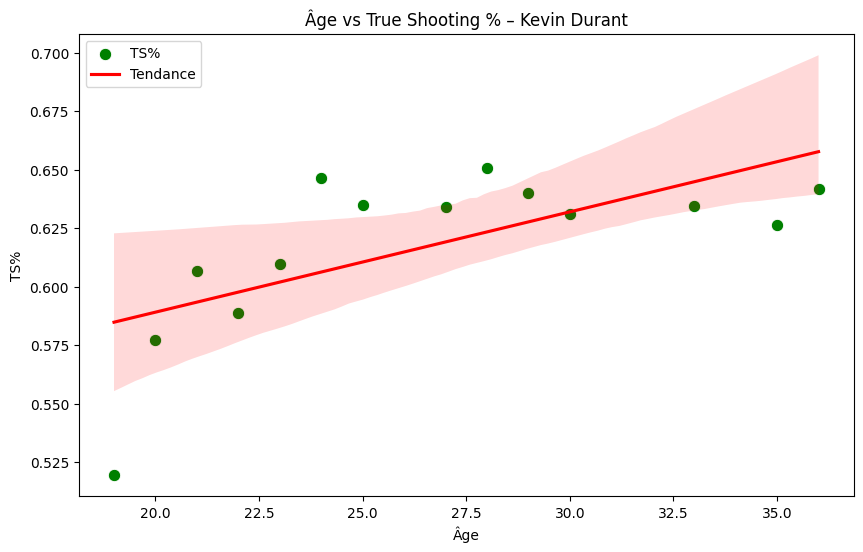

In [55]:
plt.figure(figsize=(10,6))

sns.scatterplot(x="PLAYER_AGE", y="TS_PCT", data=df, s=80, color="green", marker="o", label="TS%")
sns.regplot(x="PLAYER_AGE", y="TS_PCT", data=df, scatter=False, color="red", label="Tendance")

plt.title("Âge vs True Shooting % – Kevin Durant")
plt.xlabel("Âge")
plt.ylabel("TS%")
plt.legend()
plt.show()

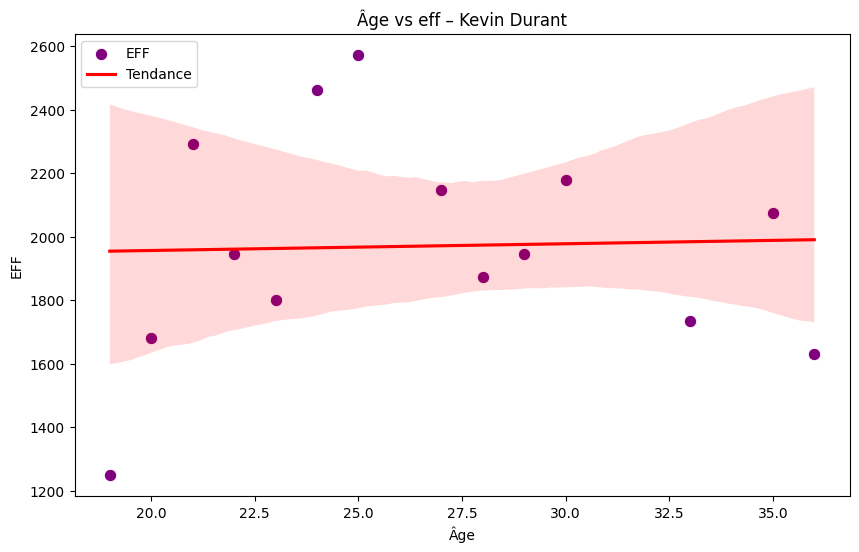

In [54]:
plt.figure(figsize=(10,6))

sns.scatterplot(x="PLAYER_AGE", y="EFF", data=df, s=80, color="purple", marker="o", label="EFF")
sns.regplot(x="PLAYER_AGE", y="EFF", data=df, scatter=False, color="red", label="Tendance")

plt.title("Âge vs eff – Kevin Durant")
plt.xlabel("Âge")
plt.ylabel("EFF")
plt.legend()
plt.show()